In [2]:
#Importing packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)



##### Load the file and make sure to include correct path



In [3]:
#importing wildlife strike dataset

strike_data = pd.read_csv('../Data/wildlife_strike_data.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Exploratory Data Analysis

#### Displaying maximum columns to get an overview of the data

In [35]:
#displaying first 5 rows

# print(strike_data.head())


strike_data.head(n=10)


,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,ENROUTE_STATE,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/96,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,NaN,CA,AWP,NaN,NaN,UAL,UNITED AIRLINES,NaN,1768.0,B-737-300,148,24,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,BLOOD ON L FWD NOSE AREA SEEN BY CREW AFTER LDG.,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/07,False
1,608243,6/26/96,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,NaN,CO,ANM,NaN,NaN,UAL,UNITED AIRLINES,NaN,1845.0,B-737-300,148,24,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,CREW SUSPECTED BIRDSTRIKE ON T/O. LOOKED LIKE ...,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/07,False
2,608244,7/1/96,7,1996,NaN,NaN,KOMA,EPPLEY AIRFIELD,41.30252,-95.89417,NaN,NE,ACE,NaN,NaN,UAL,UNITED AIRLINES,NaN,306.0,B-757-200,148,26,34.0,40.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,BIRDSTRIKE AT ROTATION. INSPN. NO DMG.,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100003/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/07,False
3,608245,7/1/96,7,1996,NaN,NaN,KIAD,WASHINGTON DULLES INTL ARPT,38.94453,-77.45581,NaN,DC,AEA,NaN,NaN,UAL,UNITED AIRLINES,NaN,510.0,A-320,04A,3,23.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Approach,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,"ON FINAL APCH, STRIKE UNDER THE NOSE OF THE CO...",False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100004/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/07,False
4,608246,7/1/96,7,1996,NaN,NaN,KLGA,LA GUARDIA ARPT,40.77724,-73.87261,NaN,NY,AEA,NaN,NaN,UAL,UNITED AIRLINES,NaN,677.0,A-320,04A,3,23.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Climb,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,True,M,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,Fal

#### Descriptive Statistics of the data

##### There are over 280k rows and 100 columns in a data

In [4]:
strike_data.shape

(284298, 100)

In [5]:
strike_data.describe()

,INDEX_NR,INCIDENT_MONTH,INCIDENT_YEAR,LATITUDE,LONGITUDE,EMA,EMO,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,HEIGHT,SPEED,DISTANCE,AOS,BIRD_BAND_NUMBER,NR_INJURIES,NR_FATALITIES
count,2.842980e+05,284298.000000,284298.000000,2.492370e+05,249236.000000,189706.000000,184640.000000,203863.000000,203636.000000,202867.000000,189194.000000,13057.000000,3279.000000,147142.000000,93478.000000,184731.000000,14008.000000,3.760000e+02,276.000000,24.000000
mean,8.630630e+05,7.171208,2011.524569,2.039567e+02,-90.880561,19.799036,8.545608,3.526736,2.014870,2.822174,2.677352,2.900973,2.043306,869.213073,142.632042,0.817497,91.816638,8.930388e+07,1.293478,2.041667
std,2.418608e+05,2.785069,8.378840,8.244053e+04,329.896282,10.738137,11.746843,0.885366,0.421376,2.113686,1.982928,1.950854,1.435394,1845.351864,46.637490,3.560952,662.912429,9.098164e+07,0.756134,1.654484
min,6.082420e+05,1.000000,1990.000000,-3.767333e+01,-177.381000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000
25%,6.881192e+05,5.000000,2006.000000,3.298764e+01,-99.072097,10.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,0.000000,1.000000,0.000000e+00,1.000000,1.000000
50%,7.622365e+05,7.000000,2013.000000,3.880581e+01,-87.904460,22.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,50.000000,140.000000,0.000000,3.000000,8.873775e+07,1.000000,1.500000
75%,1.035344e+06,9.000000,2018.000000,4.085010e+01,-80.399470,31.000000,10.000000,4.000000,2.000000,5.000000,5.000000,5.000000,4.000000,900.000000,160.000000,0.000000,24.000000,1.893339e+08,1.000000,2.000000
max,1.448359e+06,12.000000,2023.000000,4.115443e+07,164140.000000,92.000000,97.000000,5.000000,4.000000,7.000000,7.000000,6.000000,5.000000,31300.000000,1250.000000,99.000000,62848.000000,2.821218e+08,7.000000,8.000000


#### Checking the data types of the attributes

In [ ]:
types = strike_data.dtypes
print(types.to_string())
#print(types)

#### There are 37 Boolean, 17 Decimals, 43 string and 3 Integer columns

In [7]:
# counting different data types

bool_count = 0
float_count = 0
object_count = 0
int_count = 0

for x in types:
    if x == 'bool':
        bool_count +=1
    elif x == 'float64':
        float_count +=1
    elif x == 'object':
        object_count +=1
    elif x == 'int64':
        int_count +=1
        
print(f"Boolean columns: {bool_count}")
print(f"Decimal columns: {float_count}")
print(f"String columns: {object_count}")
print(f"Integer columns: {int_count}")

Boolean columns: 37
Decimal columns: 17
String columns: 43
Integer columns: 3


#### Filtering highest incident count on date at different airport levels

In [619]:
date_count_above_100 = strike_data.groupby('INCIDENT_DATE').filter(lambda group: len(group)>100)

date_count_above_100 = date_count_above_100.groupby(['INCIDENT_DATE', 'AIRPORT_ID']).size().reset_index(name='count')
date_count_above_100 = date_count_above_100.sort_values(by= 'count', ascending = False)
date_count_above_100

,INCIDENT_DATE,AIRPORT_ID,count
324,10/27/22,ZZZZ,46
1479,9/25/19,ZZZZ,41
276,10/17/19,ZZZZ,37
119,10/12/18,ZZZZ,34
601,5/11/23,ZZZZ,33
...,...,...,...
734,8/17/18,KDWH,1
731,8/17/18,KDCA,1
729,8/17/18,KDAL,1
727,8/17/18,KCOU,1


In [620]:
unique_date = strike_data.groupby('INCIDENT_DATE').size().reset_index(name='count')
unique_date= unique_date.sort_values(by='count', ascending= False)

# Print the result
print(unique_date)


      INCIDENT_DATE  count
1157       10/12/18    140
1689       10/27/22    136
11807       9/25/19    129
1884        10/4/19    129
11744       9/23/22    128
...             ...    ...
4265        2/14/92      1
7023         4/8/90      1
929          1/6/90      1
9807        7/27/23      1
9541         7/2/94      1

[12217 rows x 2 columns]


#### Exploring the ZZZZ airport ID on 10/27/22, that seems to have 46 strikes on that day

##### This data shows that there are 46 wildlife incidents happened on Unknown airports (unknown is represented as ZZZZ). Given below is the incidents occured for different flights of PSA airlines on same day

#### Checking the Airport IDs

##### Denver Int Airport,CO reports the most no. of strikes followed by Dallas Aiport,TX and O'Hare Int Airport,IL. The possible reason they have the max air traffic

In [621]:
unique_aid = strike_data.groupby('AIRPORT_ID').size().reset_index(name='count')
unique_aid= unique_aid.sort_values(by='count', ascending= False)
unique_aid

,AIRPORT_ID,count
2599,ZZZZ,34983
899,KDEN,9492
904,KDFW,7625
1605,KORD,6149
1302,KJFK,5933
...,...,...
494,EGUL,1
492,EGSX,1
1954,KTOC,1
488,EGPE,1


#### Checking duplicates in the data 

In [622]:
unique_index = strike_data.groupby('INDEX_NR').size().reset_index(name='count')

# Print the result
print(unique_index)

        INDEX_NR  count
0         608242      1
1         608243      1
2         608244      1
3         608245      1
4         608246      1
...          ...    ...
284293   1448352      1
284294   1448353      1
284295   1448356      1
284296   1448357      1
284297   1448359      1

[284298 rows x 2 columns]


In [623]:
strike_data.nunique()

INDEX_NR          284298
INCIDENT_DATE      12217
INCIDENT_MONTH        12
INCIDENT_YEAR         34
TIME                1568
                   ...  
REPORTED_TITLE         1
SOURCE                16
PERSON                 6
LUPDATE             4112
TRANSFER               1
Length: 100, dtype: int64

##### Since Index no. equals to row numbers, the Index number are unique

#### Checking Missing data

In [624]:
strike_data.isnull()

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,ENROUTE_STATE,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [625]:
strike_data.isna()

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,ENROUTE_STATE,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,True,True,True,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

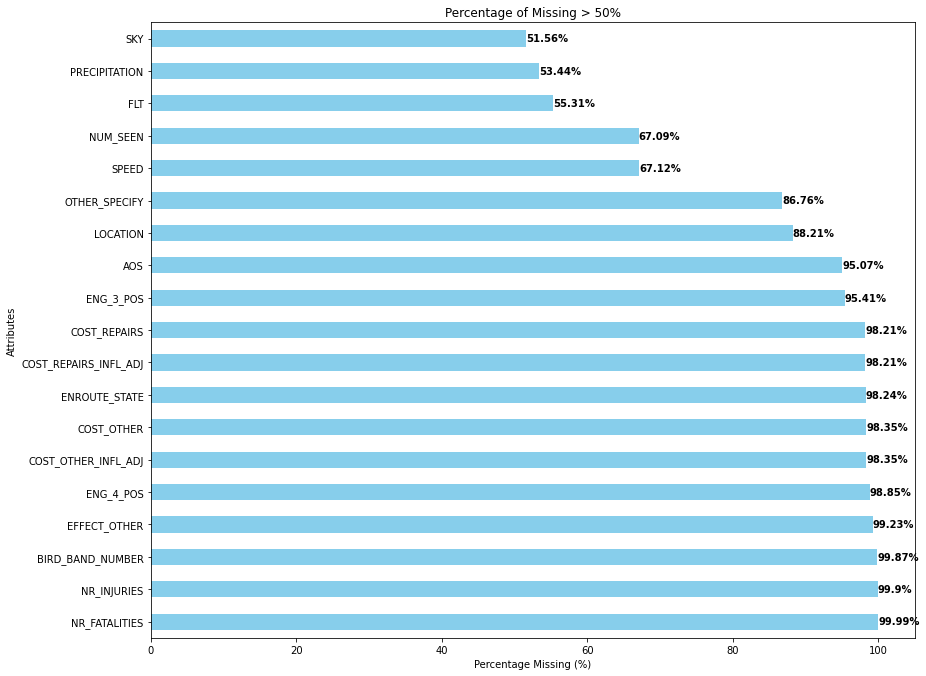

In [626]:
missing_perc = (strike_data.isnull().mean() * 100).round(2)

missing_above_50 = missing_perc[missing_perc > 50]

missing_above_50 = missing_above_50.sort_values(ascending=False)


# Create a bar chart for missing values

plt.figure(figsize=(13, len(missing_above_50) * 0.5))
bars = missing_above_50.plot(kind='barh', color='skyblue')
plt.title('Percentage of Missing > 50%')
plt.xlabel('Percentage Missing (%)')
plt.ylabel('Attributes')

for i, v in enumerate(missing_above_50):
    plt.text(v, i, str(v) + '%', va='center', fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.savefig('missing_above_50.png')
plt.show()


In [627]:
# missing_perc = (strike_data.isnull().mean() * 100).round(2)

# missing_above_7 = missing_perc[missing_perc > 7]

# missing_above_7 = missing_above_7.sort_values(ascending=False)


# # Create a bar chart for missing values

# plt.figure(figsize=(13, len(missing_above_7) * 0.5))
# bars = missing_above_7.plot(kind='barh', color='skyblue')
# plt.title('Percentage of Missing > 50%')
# plt.xlabel('Percentage Missing (%)')
# plt.ylabel('Attributes')

# for i, v in enumerate(missing_above_7):
#     plt.text(v, i, str(v) + '%', va='center', fontsize=10, color='black', fontweight='bold')

# plt.tight_layout()
# plt.savefig('missing_above_7.png')
# plt.show()


In [ ]:
total_rows = len(strike_data)
missing_values = strike_data.isnull().sum()
percentage_missing = (missing_values*100/ total_rows).round(2)
missing_data_sumr = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': percentage_missing.values
})

missing_data_sumr = missing_data_sumr.sort_values(by='Percentage Missing', ascending=False)

#print(missing_data_sumr.to_string(index=False))

missing_data_sumr.head(n=50)

In [629]:
missing_values = missing_values.sort_values(ascending=False)
print(missing_values)

NR_FATALITIES       284274
NR_INJURIES         284022
BIRD_BAND_NUMBER    283922
EFFECT_OTHER        282105
ENG_4_POS           281019
                     ...  
ING_ENG4                 0
STR_PROP                 0
DAM_PROP                 0
STR_WING_ROT             0
TRANSFER                 0
Length: 100, dtype: int64


#### Handling Missing data

##### Dropping columns with missing data more than 45%

In [630]:
# strike_data['HEIGHT'].unique()

In [631]:
# strike_data

In [632]:
#drop_columns = ['BIRD_BAND_NUMBER','EFFECT_OTHER','ENG_4_POS','ENROUTE_STATE','ENG_3_POS','OTHER_SPECIFY','LOCATION','SPEED','PRECIPITATION','SKY','EFFECT','HEIGHT']

In [633]:
#strike_data = strike_data.drop(columns=drop_columns, axis=1)

In [634]:
strike_data.shape

(284298, 88)

##### Now we have 88 columns

#### Handling othe missing data

##### Changing the data type of NR_INJURIES, NR_FATALITIES, etc to integer and then replacinf null with 0

In [635]:
#NR_FATALITIES
strike_data['NR_FATALITIES'].dtypes

dtype('float64')

In [636]:
strike_data['NR_FATALITIES'].unique()

array([nan,  1.,  2.,  8.,  3.,  4.,  5.])

In [637]:
strike_data['NR_FATALITIES'].isna()

0         True
1         True
2         True
3         True
4         True
          ... 
284293    True
284294    True
284295    True
284296    True
284297    True
Name: NR_FATALITIES, Length: 284298, dtype: bool

In [638]:
strike_data['NR_FATALITIES'] = strike_data['NR_FATALITIES'].fillna(0)

In [639]:
strike_data['NR_FATALITIES'].unique()

array([0., 1., 2., 8., 3., 4., 5.])

In [640]:
#NR_INJURIES
strike_data['NR_INJURIES'].unique()

array([nan,  1.,  2.,  5.,  7.,  4.,  3.])

In [641]:
strike_data['NR_INJURIES'] = strike_data['NR_INJURIES'].fillna(0)

In [642]:
#COST_OTHER_INFL_ADJ
strike_data['COST_OTHER_INFL_ADJ'].unique()

array([nan, '138', '11,190.00', ..., '0', '3,037.00', '150,000.00'],
      dtype=object)

In [643]:
strike_data['COST_OTHER_INFL_ADJ'] = strike_data['COST_OTHER_INFL_ADJ'].str.replace(',', '').astype(float)

In [644]:
strike_data['COST_OTHER_INFL_ADJ'] = strike_data['COST_OTHER_INFL_ADJ'].fillna(0)

In [645]:
strike_data['COST_OTHER_INFL_ADJ'].unique()

array([0.0000e+00, 1.3800e+02, 1.1190e+04, ..., 4.9112e+04, 3.0370e+03,
       1.5000e+05])

In [646]:
# COST_REPAIRS
strike_data['COST_REPAIRS'].unique()

array([nan, '2,000.00', '2,200.00', ..., '0', '15,884.00', '865,000.00'],
      dtype=object)

In [647]:
strike_data['COST_REPAIRS'] = strike_data['COST_REPAIRS'].str.replace(',', '').astype(float)

In [648]:
strike_data['COST_REPAIRS'] = strike_data['COST_REPAIRS'].fillna(0)

In [649]:
strike_data['COST_OTHER_INFL_ADJ'].unique()

array([0.0000e+00, 1.3800e+02, 1.1190e+04, ..., 4.9112e+04, 3.0370e+03,
       1.5000e+05])

In [ ]:
# COST_OTHER
strike_data['COST_OTHER'].unique()

In [651]:
strike_data['COST_OTHER'] = strike_data['COST_OTHER'].str.replace(',', '').astype(float)

In [652]:
strike_data['COST_OTHER'] = strike_data['COST_OTHER'].fillna(0)

In [653]:
# COST_OTHER
strike_data['COST_REPAIRS_INFL_ADJ'].unique()

strike_data['COST_REPAIRS_INFL_ADJ'] = strike_data['COST_REPAIRS_INFL_ADJ'].str.replace(',', '').astype(float)

In [654]:
strike_data['COST_REPAIRS_INFL_ADJ'] = strike_data['COST_REPAIRS_INFL_ADJ'].fillna(0)

In [655]:
strike_data['COST_REPAIRS_INFL_ADJ'].unique()

array([     0.,   4296.,   4924., ...,  21316.,  17000., 865000.])

##### So far replaced the numeric column with 0. lets check the missing values again

In [656]:
missing_perc = (strike_data.isna().mean() * 100).round(2)

missing_above_50 = missing_perc[missing_perc > 50]

missing_above_50 = missing_above_50.sort_values(ascending=False)

In [657]:
missing_above_50

AOS         95.07
NUM_SEEN    67.09
FLT         55.31
dtype: float64

In [658]:
#AOS
strike_data['AOS'] = strike_data['AOS'].fillna(0)

In [ ]:
strike_data['AOS'].unique()

In [660]:
# FLT
strike_data['FLT'].isna()

In [678]:
# filtered_flt = strike_data[strike_data['FLT'].isna()]
# filtered_flt

157234

In [ ]:
# strike_data['FLT'] = strike_data['FLT'].fillna(0)

In [681]:
# strike_data['FLT'].unique()

array([1768.0, 1845.0, 306.0, ..., '28963', '8704', '8879'], dtype=object)

In [682]:
# filtered_flt = strike_data[strike_data['FLT'].isna()]
# filtered_flt

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,PHASE_OF_FLIGHT,DISTANCE,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER,AID_Length


In [662]:
# strike_data['FLT'] = strike_data['FLT'].str.replace(',', '').str.split('.').str[0].astype(int)

In [663]:
# NUM_SEEN
strike_data['NUM_SEEN'].unique()

array([nan, '1', 'More than 100', '10-Feb', '11-100'], dtype=object)

##### We will replace these text values to number

In [664]:
strike_data['NUM_SEEN'].replace({'More than 100': '100', '10-Feb': '6', '11-100': '55'}, inplace=True)

In [685]:
strike_data['NUM_SEEN'].fillna(0, inplace=True)

In [686]:
strike_data['NUM_SEEN'].unique()

array([0, '1', '100', '6', '55'], dtype=object)

In [687]:
strike_data['NUM_SEEN'] = strike_data['NUM_SEEN'].astype(int)

##### So far we have addressed all the missing values which has missing greater than 50%.Now lets have a look at some other data

In [689]:
missing_perc = (strike_data.isna().mean() * 100).round(2)

missing_above_30 = missing_perc[missing_perc > 30]

missing_above_30 = missing_above_30.sort_values(ascending=False)
missing_above_30

TIME               43.92
TIME_OF_DAY        42.19
REG                40.19
PHASE_OF_FLIGHT    38.24
EMO                35.05
DISTANCE           35.02
DAMAGE_LEVEL       34.89
AMO                33.78
ENG_2_POS          33.45
EMA                33.27
dtype: float64

In [690]:
strike_data.to_csv('strike_data_clean_1.csv', index=False)

#### Checking the length of the airport IDs

##### ICAO codes are 4 letters fixed code. Checking the length of the codes can help us improve airport IDs

##### As we see that there are 95 Airport IDs with length greater than 4 and 976 airport IDs with length less than 4

In [668]:
strike_data['AID_Length'] = strike_data['AIRPORT_ID'].apply(lambda x: len(str(x)))

# # Count airport IDs with lengths greater than 4
aid_above_4 = len(strike_data[strike_data['AID_Length'] > 4])

# Count airport IDs with lengths less than or equal to 4
aid_below_4 = len(strike_data[strike_data['AID_Length'] < 4])

print("Airport IDs with length greater than 4:", aid_above_4)
print("Airport IDs with length less than 4:", aid_below_4)


Airport IDs with length greater than 4: 95
Airport IDs with length less than 4: 976


#### Looking at these columns will give an idea of data quality issues

In [669]:
filter_aid_above_4 = strike_data[strike_data['AID_Length'] > 4]
filter_aid_above_4

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,PHASE_OF_FLIGHT,DISTANCE,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER,AID_Length
24,608268,10/18/91,10,1991,NaN,Day,KDEN*,DENVER STAPLETON ARPT,39.8584,-104.767,26R,CO,ANM,BTA,EXPRESSJET (CONTINENTAL EXPRS),NaN,NaN,ATR-42,97,1,31.0,10.0,A,3.0,C,2.0,4.0,4.0,Approach,4.0,0.0,0.0,0.0,0.0,0.0,False,True,S,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,True,J2204,Canada goose,FLT 2209. TIME = 1826LCL. HIT FLOCK OF GEESE ...,False,False,Unknown,6,10-Feb,Large,0.0,0.0,/Legacy Record=100027/,REDACTED,REDACTED,AC Incident Rept,Tower,5/19/05,False,5
617,608979,8/19/91,8,1991,NaN,Day,KDEN*,DENVER STAPLETON ARPT,39.8584,-104.767,35R,CO,ANM,BTA,EXPRESSJET (CONTINENTAL EXPRS),N918RM,NaN,BE-1900,123,27,31.0,4.0,A,3.0,C,2.0,4.0,4.0,Take-off Run,0.0,0.0,0.0,0.0,0.0,0.0,False,False,N,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,ZX3,Sparrows,NaN,False,False,No,6,1,Small,0.0,0.0,/Legacy Record=100739/,REDACTED,REDACTED,FAA Form 5200-7,NaN,5/19/05,False,5
713,609097,4/25/91,4,1991,NaN,Day,KDEN*,DENVER STAPLETON ARPT,39.8584,-104.767,NaN,CO,ANM,AAL,AMERICAN AIRLINES,NaN,NaN,MD-80,583,37,34.0,10.0,A,4.0,D,2.0,5.0,5.0,Landing Roll,0.0,0.0,0.0,0.0,0.0,0.0,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,YL001,European starling,NO DAMAGE/INJURY. TIME = 0918 LCL.,False,False,Yes,1,1,Small,0.0,0.0,DATE = POSTMARK /Legacy Record=100857/,REDACTED,REDACTED,FAA Form 5200-7,NaN,5/19/05,False,5
795,609197,5/4/90,5,1990,NaN,Day,KDEN*,DENVER STAPLETON ARPT,39.8584,-104.767,NaN,CO,ANM,AAL,AMERICAN AIRLINES,NaN,NaN,B-727-200,148,11,34.0,10.0,A,4.0,D,3.0,5.0,6.0,Take-off Run,0.0,0.0,0.0,0.0,0.0,0.0,False,False,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,K33,Hawks,NO DAMAGE NOTED.,False,False,No,1,1,Medium,0.0,0.0,/Legacy Record=100957/,REDACTED,REDACTED,FAA Form 5200-7,Pilot,5/19/05,False,5
841,609250,7/9/92,7,1992,NaN,Dawn,KDEN*,DENVER STAPLETON ARPT,39.8584,-104.767,17R,CO,ANM,BUS,BUSINESS,N6356D,NaN,C-172,226,7,7.0,10.0,A,1.0,A,1.0,7.0,NaN,Climb,NaN,0.0,0.0,1000.0,0.0,2085.0,False,False,N,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,UNKBM,Unknown bird - medium,$1 WAS ENTERED FOR COST OF REPAIRS (COST WAS T...,False,False,No,NaN,1,Medium,0.0,0.0,OPERATOR = N757GC CORP (5/2/12 UPDATED COSTS &...,REDACTED,REDACTED,FAA Form 5200-7,NaN,5/2/12,False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

##### As we see there are rows with 'KDEN*'. An addition of '*' is creating this issue and hence can be addressed

In [670]:
filter_aid_below_4 = strike_data[strike_data['AID_Length'] < 4]
filter_aid_below_4

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,PHASE_OF_FLIGHT,DISTANCE,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER,AID_Length
124,608391,11/27/93,11,1993,NaN,Night,M22,BILL PUGH FIELD ARPT,34.449540,-87.710310,9,AL,ASO,PVT,PRIVATELY OWNED,N2498S,NaN,C-210 CENTURION,226,19,13.0,16.0,A,1.0,A,1.0,7.0,NaN,Landing Roll,0.0,0.0,0.0,0.0,0.0,0.0,False,True,S,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,1G11,White-tailed deer,SUBSTANTIAL DAMAGE. DEER HIT A/C IN VERTICLE A...,False,False,Unknown,1,1,Large,0.0,0.0,/Legacy Record=100150/,REDACTED,REDACTED,AAIPN-1,Pilot,3/29/02,False,3
236,608523,9/5/93,9,1993,NaN,Day,3A2,NEW TAZEWELL MUNICIPAL,36.410080,-83.555460,7,TN,ASO,BUS,BUSINESS,N690HT,NaN,RKWLTRBO 690,765,11,19.0,4.0,A,2.0,C,2.0,4.0,4.0,Take-off Run,0.0,0.0,0.0,0.0,0.0,0.0,False,False,N,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,UNKBS,Unknown bird - small,NUMEROUS BIRDS WERE UNDETERRED BY OUR BACK-TAX...,False,False,No,55,1,Small,0.0,0.0,"OPERATOR = EXTRAORDINAIRE, INC. (HAZEL THOMAS)...",REDACTED,REDACTED,FAA Form 5200-7,NaN,5/28/98,False,3
450,608786,7/23/93,7,1993,NaN,Day,W91,SMITH MOUNTAIN LAKE,37.104500,-79.588700,5,VA,AEA,PVT,PRIVATELY OWNED,N735EM,NaN,C-182,226,11,13.0,13.0,A,1.0,A,1.0,7.0,NaN,Take-off Run,0.0,0.0,0.0,0.0,0.0,0.0,False,True,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,1G11,White-tailed deer,A/C WAS ATTEMPTING T/O ON RY 5/23 WHEN IT STRU...,False,False,Unknown,NaN,1,Large,0.0,0.0,/Legacy Record=100546/,REDACTED,REDACTED,PACIR,Tower,3/29/02,False,3
1173,609636,6/14/90,6,1990,NaN,Day,3CK,LAKE IN THE HILLS,42.206800,-88.323040,NaN,IL,AGL,BUS,BUSINESS,NaN,NaN,C-152,226,36,7.0,4.0,A,1.0,A,1.0,7.0,NaN,Climb,NaN,0.0,0.0,0.0,0.0,0.0,False,True,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,O2111,Rock pigeon,DENT IN LE RT WING.,False,False,No,NaN,1,Small,0.0,0.0,OPER = NORTHERN ILLINOIS FLIGHT CENTER /Legacy...,REDACTED,REDACTED,FAA Form 5200-7,NaN,3/12/99,False,3
1353,609851,10/2/90,10,1990,NaN,Night,1G3,KENT STATE UNIVERSITY,41.151860,-81.416580,19,OH,AGL,BUS,BUSINESS,N95429,NaN,C-152,226,36,7.0,7.0,A,1.0,A,1.0,7.0,NaN,Take-off Run,0.0,0.0,0.0,0.0,0.0,0.0,False,True,S,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True,False,False,False,False,False,False,1G11,White-tailed deer,HIT BUCK ON ROTATION FOR T/O. BENT PROP'S & D...,False,False,No,1,1,Large,0.0,0.0,OPERATOR = KENT STATE UNIV. /Legacy Record=101...,REDACTED,REDACTED,FAA Form 5200-7,Pilot,3/29/02,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

##### As we see there are rows with 'W91'. We need to confirm are these codes incomplete

##### In conclusion, some airport IDs are not in a standard format

#### Now we will start looking at the missing columns one by one, to find out any data quality issues

In [671]:
## NR_FATALITIES

fatal = strike_data['NR_FATALITIES'].unique()
fatal

array([0., 1., 2., 8., 3., 4., 5.])

In [672]:
strike_data['NR_FATALITIES'].nunique()

7

##### There are only 6 values in this column, the NA or blank spaces are 0, meaning there are no fatalities. (need to confirm)

In [673]:
## NR_INJURIES
print(strike_data['NR_INJURIES'].unique())
print(strike_data['NR_INJURIES'].nunique())

[0. 1. 2. 5. 7. 4. 3.]
7


##### There are only 6 values in this column, the NA or blank spaces are 0, meaning there are no injuries. (need to confirm)

In [ ]:
## BIRD_BAND_NUMBER
# print(strike_data['BIRD_BAND_NUMBER'].unique())
print(strike_data['BIRD_BAND_NUMBER'].nunique())

##### There are only 201 bird band numbers,there's possibility that the missing values have wildlifes other than birds

In [ ]:
## Checking Bird Band number with Species to confirm if missing values are other species than birds

band = strike_data[(strike_data['BIRD_BAND_NUMBER'].isnull() | (strike_data['BIRD_BAND_NUMBER'] == 0))]
band[['BIRD_BAND_NUMBER','SPECIES']]

##### From the above result it can be said that the missing values contains the birds and other wildlife. Therfore, there are some missing band bird number for birds.

In [ ]:
# COST_OTHER_INFL_ADJ

print(strike_data['COST_OTHER_INFL_ADJ'].unique())
print(strike_data['COST_OTHER_INFL_ADJ'].nunique())


In [ ]:
cost_adj=strike_data['COST_OTHER_INFL_ADJ'].dtype
print(cost_adj)

In [ ]:
print(strike_data['COST_OTHER'].dtype)

##### Since this is a object datatype we will convert into numeric

#### Converting cost columns into float (decimal) datatypes

##### Some values are written in string (‘5,000’) or float (5000.00) or integer (5000), that need to be converted into float dtype.

In [ ]:

# # Sample data
# data = {'Cost': ['5,000', 100.5, '2,500.75', '3,200', '7.8']}

# # Create a DataFrame
# df = pd.DataFrame(data)

# Define a custom function to convert values to numbers
def convert_to_number(value):
    if isinstance(value, (int, float)):
        return value
    if isinstance(value, str):
        # Remove commas and check for decimals
        cleaned_value = re.sub(r'[^\d.]', '', value)
        if '.' in cleaned_value:
            return float(cleaned_value)
        else:
            return int(cleaned_value)
    return value  # Return other types unchanged

# Apply the custom function to the 'Cost' column
strike_data['COST_REPAIRS'] = strike_data['COST_REPAIRS'].apply(convert_to_number)

# # Check the data types after conversion
print(strike_data['COST_REPAIRS'].dtype)


In [ ]:
strike_data['COST_REPAIRS']

In [ ]:
strike_data['COST_OTHER'] = strike_data['COST_OTHER'].apply(convert_to_number)
print(strike_data['COST_OTHER'].dtype)

In [ ]:
strike_data['COST_REPAIRS_INFL_ADJ'] = strike_data['COST_REPAIRS_INFL_ADJ'].apply(convert_to_number)
print(strike_data['COST_REPAIRS_INFL_ADJ'].dtype)

In [ ]:
strike_data['COST_OTHER_INFL_ADJ'] = strike_data['COST_OTHER_INFL_ADJ'].apply(convert_to_number)
print(strike_data['COST_OTHER_INFL_ADJ'].dtype)

##### Converted all the cost columns to float

In [ ]:
strike_data['ENROUTE_STATE'].unique()

In [ ]:
strike_data['AOS']

In [ ]:
aos = strike_data[(strike_data['AOS'].notna())]

In [ ]:
print(strike_data['AOS'].dtype)

##### AOS if blank is unknown. We may replace this with NA

In [ ]:
strike_data['LOCATION'].unique()

In [ ]:
strike_data['OTHER_SPECIFY'].unique()

##### 'Location' and 'Other Specify' columns are descriptive types and hence we may not make any changes

In [ ]:
# NUM_SEEN

print(strike_data['NUM_SEEN'].unique())

In [ ]:
print(strike_data['NUM_SEEN'].dtype)

In [ ]:
# NUM_STRUCK

print(strike_data['NUM_STRUCK'].unique())

In [ ]:
print(strike_data['NUM_STRUCK'].dtype)

##### NUM_SEEN & NUM_SEEN are given in a number range and has a string data type. Some numbers took date formats, they should be in Integer

In [ ]:
print(strike_data['FLT'].unique())

In [ ]:
print(strike_data['FLT'].dtype)

In [ ]:
strike_data['FLT'].head(n=5)

In [ ]:
strike_data[(strike_data['FLT'].notna())]

##### FLT is a Flight No., ~50% of the flight number is missing. 

In [ ]:
print(strike_data['PRECIPITATION'].unique())

##### There is an opportunity to re-organize these categories.

In [ ]:
print(strike_data['SKY'].unique())

##### For SKY, the missing values can be replaced by NA

In [ ]:
#EFFECT
print(strike_data['EFFECT'].unique())

##### There is an opportunity to re-organize these categories.

In [ ]:
#HEIGHT
print(strike_data['HEIGHT'])

##### Since 44% of data is missing, we might think to impute the values using measures such as mean, median or mode

In [ ]:
strike_data['HEIGHT'].mean()

In [ ]:
strike_data['HEIGHT'].median()

In [ ]:
strike_data['HEIGHT'].max()

In [ ]:
df_height = strike_data[(strike_data['HEIGHT'].notna())]

In [ ]:
df_height['HEIGHT'].min()

##### We might need to evaluate on other parameters that can help in recognizing height patterns

In [ ]:
#TIME & TIME OF DAY

In [ ]:
print(strike_data['TIME'].unique())

In [ ]:

# Define a regular expression pattern for "hh:mm" format
time_pattern = r'^([0-1]?[0-9]|2[0-3]):[0-5][0-9]$'

# Check if 'Time' column follows the "hh:mm" format
strike_data['NEW_TIME'] = strike_data['TIME'].str.match(time_pattern, na=False)

# Filter out data points that follow the "hh:mm" format
filter_time = strike_data[strike_data['NEW_TIME']]

# Print the resulting DataFrame

print(filter_time[['TIME','NEW_TIME']])

##### There are 158994 that matches the hh:mm format for TIME column.

In [ ]:
# Filter data that doesn't follow time hh:mm format

non_time = strike_data[strike_data['NEW_TIME'] == False]

In [ ]:
non_time['TIME'].unique()

##### This different patterns of time needs to be changed to hh:mm format

In [ ]:
# TIME OF DAY

print(strike_data['TIME_OF_DAY'].unique())

##### These categories seems to be organized. We will replace blanks with NA

In [ ]:
# REG
print(strike_data['REG'].unique())

In [ ]:
#PHASE_OF_FLIGHT
print(strike_data['PHASE_OF_FLIGHT'].unique())

In [ ]:
#DAMAGE_LEVEL
print(strike_data['DAMAGE_LEVEL'].unique())

In [ ]:
#EMO
print(strike_data['EMO'].unique())

In [ ]:
print(strike_data['EMO'].dtype)

In [ ]:
#DISTANCE
print(strike_data['DISTANCE'].unique())

In [ ]:
print(strike_data['DISTANCE'].dtype)

##### NaN can be replaced with 0

In [ ]:
#AMO
print(strike_data['AMO'].unique())

In [ ]:
# strike_data[strike_data['AMO']=='0']
# strike_data[strike_data['AMO']=='N16']

##### Nan can be replaced with 0

In [ ]:
print(strike_data['ENG_2_POS'].unique())

In [ ]:
#EMA
print(strike_data['EMA'].unique())

In [ ]:
#AMA
print(strike_data['AMA'].unique())

In [ ]:
#TYPE_ENG
print(strike_data['TYPE_ENG'].unique())

In [ ]:
#NUM_ENGS
print(strike_data['NUM_ENGS'].unique())

In [ ]:
print(strike_data['NUM_ENGS'].dtype)

In [ ]:
#AC_MASS
print(strike_data['AC_MASS'].unique())

In [ ]:
#AC_CLASS
print(strike_data['AC_CLASS'].unique())

In [ ]:
#RUNWAY
print(strike_data['RUNWAY'].unique())

In [ ]:
# strike_data[strike_data['RUNWAY'].notna()]

In [ ]:
strike_data[strike_data['RUNWAY']=='Taxiway Victor']

In [ ]:
#FAAREGION
print(strike_data['FAAREGION'].unique())

In [ ]:
#STATE
print(strike_data['STATE'].unique())

In [ ]:
#SIZE
print(strike_data['SIZE'].unique())

In [ ]:
#REMARKS
print(strike_data['REMARKS'].unique())

In [ ]:
#PERSON
print(strike_data['PERSON'].unique())

In [ ]:
#NUM_STRUCK
print(strike_data['NUM_STRUCK'].unique())

In [ ]:
# PRECIPITATION
print(strike_data['PRECIPITATION'].unique())

#### Exploring other columns

In [ ]:
missing_data_sumr.head(n=50).sort_values(ascending=True, by='Percentage Missing')

#### Checking for outliers by creating box plots

In [ ]:
# Checking for outliers by creating box plots

box_columns = ['EMA', 'EMO', 'AC_MASS','NUM_ENGS','HEIGHT','SPEED','DISTANCE','BIRD_BAND_NUMBER', 'NR_INJURIES','NR_FATALITIES']

# Create a figure with subplots
plt.figure(figsize=(15, 10)) 

# Loop through the selected columns and create boxplots for each
for i, column in enumerate(box_columns, 1):
    plt.subplot(1, len(box_columns), i)
    sns.boxplot(data=strike_data, y=column)
    #plt.title(column)

plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

In [ ]:
#sns.boxplot?

In [ ]:
float_columns = strike_data.select_dtypes(include=['float'])
print(float_columns)

#### Descriptive Statistics

In [ ]:
##### Question 1: Which airports reported the most incidents?

In [ ]:
airport_cnt = strike_data[['AIRPORT_ID','AIRPORT']].value_counts()

In [ ]:
airport_cnt.head(10)

In [ ]:
##### Question 2: Which states reported the most incidents?

In [ ]:
state_cnt = strike_data['STATE'].value_counts()

In [ ]:
state_cnt.head(10)

In [ ]:
##### Question 3: Which year reported most of the incidents ?

In [ ]:
year_cnt = strike_data['INCIDENT_YEAR'].value_counts()

In [ ]:
year_cnt.head(n=10)

In [ ]:
##### Question 4: Which time of the day most incidents happened?

In [ ]:
time_cnt = strike_data['TIME_OF_DAY'].value_counts()

In [ ]:
time_cnt.head(n=10)

In [ ]:
##### Question 4: What are the most common wildlife that had collision with the aircraft?

In [ ]:
species_cnt = strike_data[['SPECIES_ID','SPECIES']].value_counts()

In [ ]:
species_cnt.head(n=10)

In [ ]:
##### Question 5: Which airlines had the maximum number of strikes?

In [ ]:
flt_cnt = strike_data['OPERATOR'].value_counts()

In [ ]:
flt_cnt.head(n=10)

In [ ]:
# strike_data[['SKY','PRECIPITATION']]

In [ ]:
# sky = strike_data[(strike_data['SKY'].notna())]
# sky[['SKY','PRECIPITATION']]

In [ ]:
# ppt = strike_data[(strike_data['PRECIPITATION'].notna())]
# ppt[['SKY','PRECIPITATION']]

In [ ]:
types = strike_data.dtypes
print(types.to_string())
#print(types)

In [ ]:
## Data Cleaning

In [ ]:
strike_data.info()

In [ ]:
for col in strike_data.columns:
    print('{} : {}'.format(col,strike_data[col].unique()))

#### Replacing the AIRPORT ID column where the some airports have * symbol in their IDs

In [ ]:
filter_aid_above_4 = strike_data[strike_data['AID_Length'] > 4]
filter_aid_above_4['AIRPORT_ID'].unique()

In [ ]:
##################################################################################################################################

In [4]:
strike_data.head(n=2)

,INDEX_NR,INCIDENT_DATE,INCIDENT_MONTH,INCIDENT_YEAR,TIME,TIME_OF_DAY,AIRPORT_ID,AIRPORT,LATITUDE,LONGITUDE,RUNWAY,STATE,FAAREGION,LOCATION,ENROUTE_STATE,OPID,OPERATOR,REG,FLT,AIRCRAFT,AMA,AMO,EMA,EMO,AC_CLASS,AC_MASS,TYPE_ENG,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_3_POS,ENG_4_POS,PHASE_OF_FLIGHT,HEIGHT,SPEED,DISTANCE,SKY,PRECIPITATION,AOS,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,INGESTED_OTHER,INDICATED_DAMAGE,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,DAM_NOSE,STR_ENG1,DAM_ENG1,ING_ENG1,STR_ENG2,DAM_ENG2,ING_ENG2,STR_ENG3,DAM_ENG3,ING_ENG3,STR_ENG4,DAM_ENG4,ING_ENG4,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,DAM_OTHER,OTHER_SPECIFY,EFFECT,EFFECT_OTHER,BIRD_BAND_NUMBER,SPECIES_ID,SPECIES,REMARKS,REMAINS_COLLECTED,REMAINS_SENT,WARNED,NUM_SEEN,NUM_STRUCK,SIZE,NR_INJURIES,NR_FATALITIES,COMMENTS,REPORTED_NAME,REPORTED_TITLE,SOURCE,PERSON,LUPDATE,TRANSFER
0,608242,6/22/96,6,1996,NaN,NaN,KSMF,SACRAMENTO INTL,38.69542,-121.59077,NaN,CA,AWP,NaN,NaN,UAL,UNITED AIRLINES,NaN,1768.0,B-737-300,148,24,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,BLOOD ON L FWD NOSE AREA SEEN BY CREW AFTER LDG.,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100001/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/07,False
1,608243,6/26/96,6,1996,NaN,NaN,KDEN,DENVER INTL AIRPORT,39.85841,-104.66700,NaN,CO,ANM,NaN,NaN,UAL,UNITED AIRLINES,NaN,1845.0,B-737-300,148,24,10.0,1.0,A,4.0,D,2.0,1.0,1.0,NaN,NaN,Take-off Run,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,NaN,UNKBM,Unknown bird - medium,CREW SUSPECTED BIRDSTRIKE ON T/O. LOOKED LIKE ...,False,False,Unknown,NaN,1,Medium,NaN,NaN,/Legacy Record=100002/,REDACTED,REDACTED,Air Transport Report,Air Transport Operations,12/20/07,False


In [5]:
iad_df = strike_data[(strike_data['AIRPORT_ID'] == 'KIAD') | strike_data['AIRPORT'].str.contains('Dulles')]

In [7]:
iad_df.shape

(2426, 100)

In [8]:
iad_df = iad_df[(iad_df['INCIDENT_YEAR'] >= 2019) & (iad_df['INCIDENT_YEAR'] <= 2022)]

In [9]:
iad_df.shape

(309, 100)

In [10]:
iad_df.dtypes

INDEX_NR           int64
INCIDENT_DATE     object
INCIDENT_MONTH     int64
INCIDENT_YEAR      int64
TIME              object
                   ...  
REPORTED_TITLE    object
SOURCE            object
PERSON            object
LUPDATE           object
TRANSFER            bool
Length: 100, dtype: object

In [13]:
iad_yr = strike_data.groupby('INCIDENT_YEAR').size().reset_index(name='count')

In [14]:
iad_yr

,INCIDENT_YEAR,count
0,1990,2120
1,1991,2516
2,1992,2651
3,1993,2624
4,1994,2708
5,1995,2825
6,1996,3031
7,1997,3559
8,1998,3809
9,1999,5120
